In [1]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\future\Downloads\Customertravel.csv"
churn_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(churn_data.head())


   Age FrequentFlyer AnnualIncomeClass  ServicesOpted  \
0   34            No     Middle Income              6   
1   34           Yes        Low Income              5   
2   37            No     Middle Income              3   
3   30            No     Middle Income              2   
4   30            No        Low Income              1   

  AccountSyncedToSocialMedia BookedHotelOrNot  Target  
0                         No              Yes       0  
1                        Yes               No       1  
2                        Yes               No       0  
3                         No               No       0  
4                         No               No       0  


In [3]:
# Check the shape of the dataset
print(f"Dataset Shape: {churn_data.shape}")

# Display data types and missing values
print(churn_data.info())

# Get basic statistics
print(churn_data.describe())


Dataset Shape: (954, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB
None
              Age  ServicesOpted      Target
count  954.000000     954.000000  954.000000
mean    32.109015       2.437107    0.234801
std      3.337388       1.606233    0.424097
min     27.000000       1.000000    0.000000
25%     30.000000       1.000000    0.000000
50%     31.000000       2.000000    0.0000

In [5]:
# Check for missing values
missing_values = churn_data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

# Fill or drop missing values if any (for example)
churn_data.fillna(churn_data.mode().iloc[0], inplace=True)  # For categorical columns


Missing Values:
 Series([], dtype: int64)


In [7]:
# Convert 'FrequentFlyer', 'AccountSyncedToSocialMedia', and 'BookedHotelOrNot' to binary
churn_data['FrequentFlyer'] = churn_data['FrequentFlyer'].map({'Yes': 1, 'No': 0})
churn_data['AccountSyncedToSocialMedia'] = churn_data['AccountSyncedToSocialMedia'].map({'Yes': 1, 'No': 0})
churn_data['BookedHotelOrNot'] = churn_data['BookedHotelOrNot'].map({'Yes': 1, 'No': 0})

# Convert 'AnnualIncomeClass' into dummy variables
churn_data = pd.get_dummies(churn_data, columns=['AnnualIncomeClass'], drop_first=True)


In [9]:
from sklearn.preprocessing import StandardScaler

# Scale the Age feature
scaler = StandardScaler()
churn_data['Age'] = scaler.fit_transform(churn_data[['Age']])


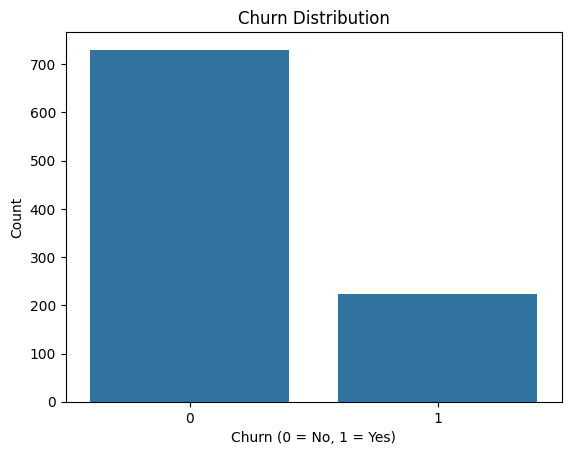

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable (churn)
sns.countplot(x='Target', data=churn_data)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


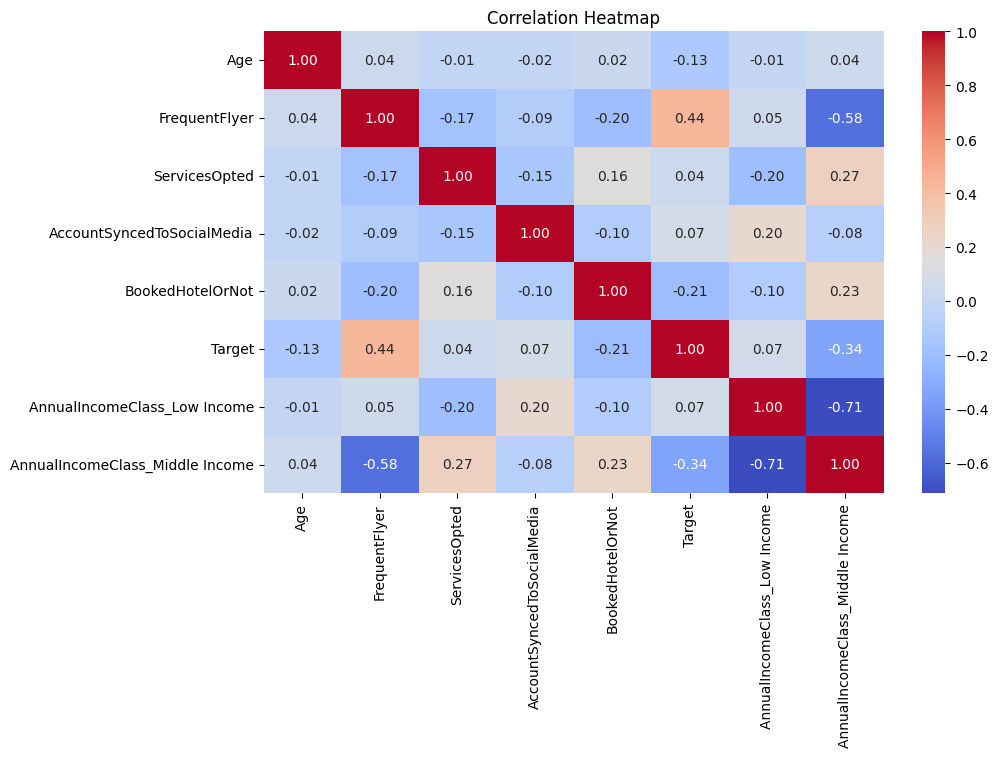

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = churn_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



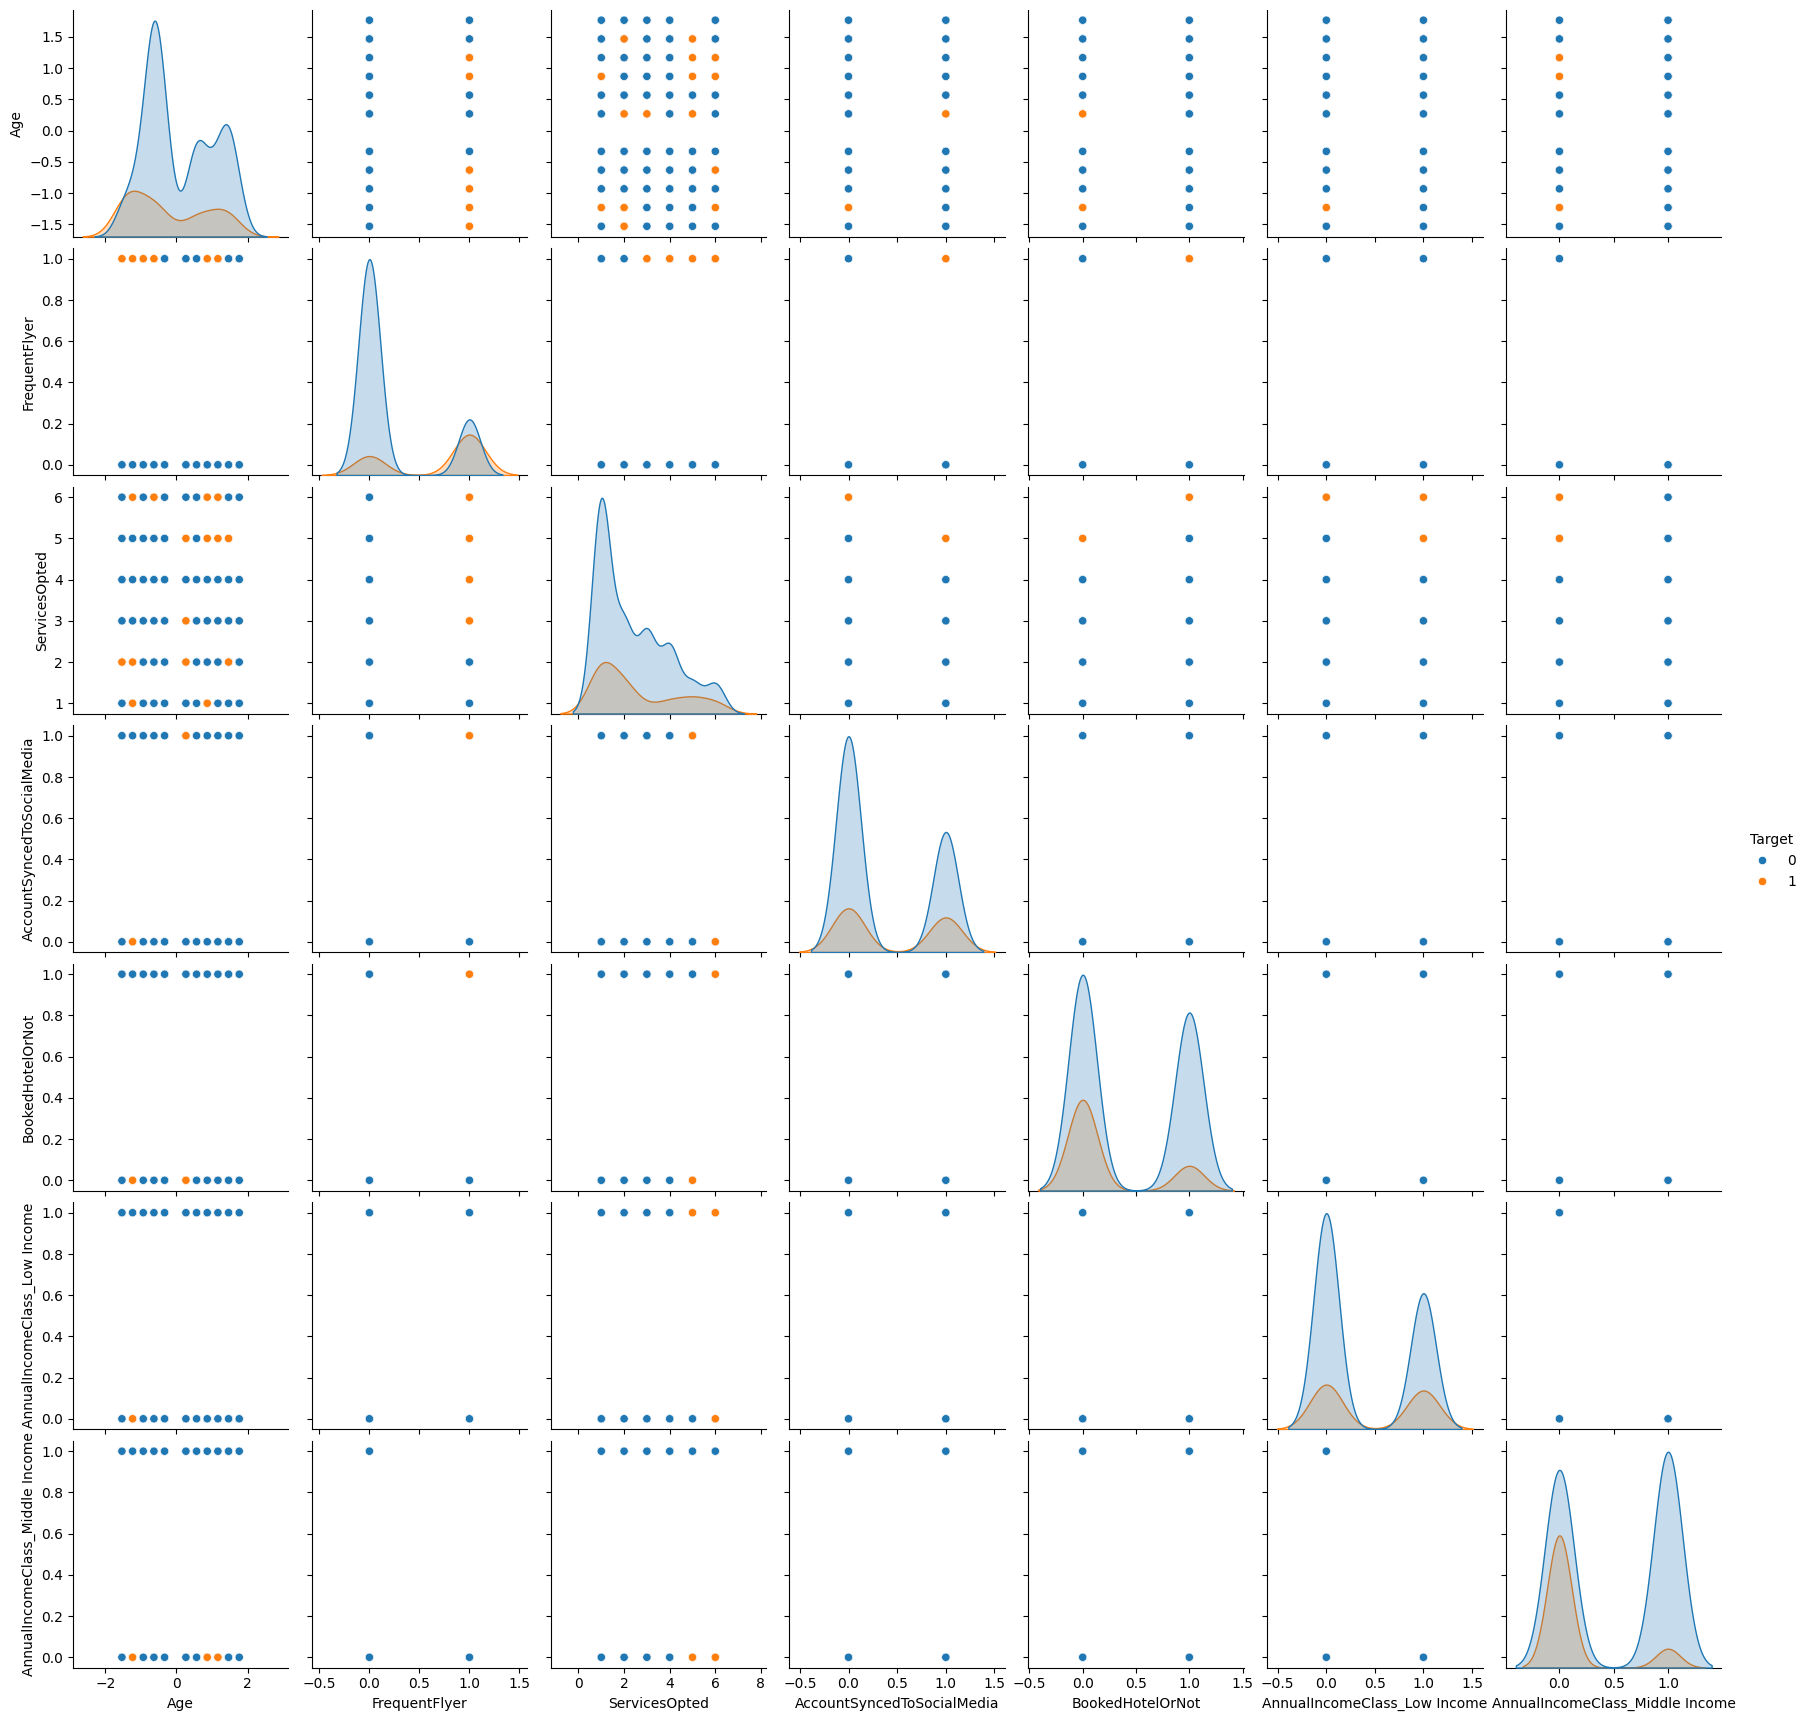

In [15]:
# Pair plot to visualize relationships
sns.pairplot(churn_data, hue='Target')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = churn_data.drop('Target', axis=1)  # Features
y = churn_data['Target']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))


[[144   9]
 [ 14  24]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       153
           1       0.73      0.63      0.68        38

    accuracy                           0.88       191
   macro avg       0.82      0.79      0.80       191
weighted avg       0.87      0.88      0.88       191

ROC-AUC Score: 0.9438424492604058
